![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)

# Objectives

- Load .csv files into `pandas` DataFrames
- Describe and manipulate data in Series and DataFrames

# What is Pandas?

![I have no idea what I'm doing panda](https://cdn-images-1.medium.com/max/1600/1*oBx032ncOwLmCFX3Epo3Zg.jpeg)

Just kidding - not actual literal pandas.

Pandas, as [the Anaconda docs](https://docs.anaconda.com/anaconda/packages/py3.7_osx-64/) tell us, offers us "High-performance, easy-to-use data structures and data analysis tools." It's something like "Excel for Python", but it's quite a bit more powerful. The name comes from "panel data", a common way to describe the kind of multidimensional data we'll be working with in certain academic circles (namely, statistics and econometrics) [[Source]](https://www.dlr.de/sc/Portaldata/15/Resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf)

In order to use pandas, we'll need to import it into our notebook first.

In [1]:
# Import - using the common alias
import pandas as pd

## Accessing Data

![pandas documentation image showcasing the kinds of data it can both read and write to](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)

[[Image Source]](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html)

Pandas can access a ton of different data types, including some that should be familiar: CSVs and JSONs! That's right, no more `with` / `open` statements now that we're using pandas!

Most of the time, we'll see CSVs - so let's access a 'toy' data set quickly just to familiarize ourselves with using pandas. There's a heart dataset available in the data folder on this repository - let's read that in.

In [2]:
# Use read_csv to read in the heart csv file
# Need to assign it to a variable too - let's call this heart_df
heart_df = pd.read_csv('data/heart.csv')

Find out more about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Heart%29).

The output of the `.read_csv()` function is a pandas *DataFrame*, which has a familiar tabaular structure of rows and columns.

In [3]:
# Let's check this variable out
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
# What type is this variable?
type(heart_df)

pandas.core.frame.DataFrame

## DataFrames and Series

Two main types of pandas objects are the DataFrame and the Series, the latter being in effect a single column of the former:

In [14]:
# Let's grab just one column
age_series = None

Notice how we can isolate a column of our DataFrame simply by using square brackets together with the name of the column. We can also access columns as an attribute of the DataFrame - but that only works if the name of the column doesn't have any spaces or weird characters!

In [15]:
None

In [16]:
# What type is the column?
type(age_series)

NoneType

Both Series and DataFrames have an *index* as well:

In [17]:
heart_df.index

RangeIndex(start=0, stop=303, step=1)

In [18]:
age_series.index

AttributeError: 'NoneType' object has no attribute 'index'

DataFrames have columns - but a Series is just a single column, so it doesn't have the columns attribute.

In [19]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
# This will throw an error!
age_series.columns

AttributeError: 'NoneType' object has no attribute 'columns'

Pandas is built on top of NumPy, and we can always access the NumPy array underlying a DataFrame using `.values`.

In [21]:
heart_df.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

## Basic DataFrame Attributes and Methods

### `.head()` : first 5 rows

In [22]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### `.tail()` : last 5 rows

In [23]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### `.info()` : information about the columns, including about nulls in those columns

In [24]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### `.describe()` : statistics about the data

In [25]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
heart_df.describe()['age']

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

<AxesSubplot: >

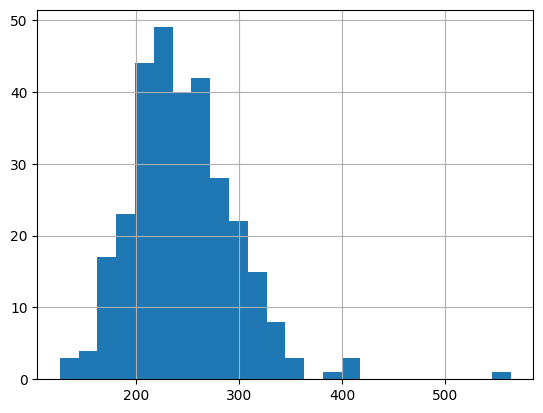

In [27]:
heart_df['chol'].hist(bins='auto')

### `.dtypes` : data types of each column

In [28]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### `.shape` : number of rows and columns

In [29]:
heart_df.shape

(303, 14)

### Statistics

We saw them above, in the `.describe`, but we can also calculate statistics by calling them individually.

In [30]:
# Calculate the mean - for the whole dataframe!
heart_df.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [31]:
# Now min
heart_df.min()

age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64

In [32]:
# And max
heart_df.max()

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

## Enough With The Small Stuff - Bring On Real Data!

Let's access an open data portal and get some real live data!

Austin Animal Center Intake Data: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm/

In [33]:
# Accessing a CSV from a url
intakes_url = pd.read_csv('https://data.austintexas.gov/resource/wter-evkm.csv')
intakes_url.head()

,animal_id,name,datetime,datetime2,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
0,A786884,*Brock,2019-01-03T16:19:00.000,2019-01-03T16:19:00.000,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A857105,Johnny Ringo,2022-05-12T00:23:00.000,2022-05-12T00:23:00.000,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby
4,A682524,Rio,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [34]:
# Same as the JSON output from this API endpoint, but different levels of detail for dates!
pd.read_json('https://data.austintexas.gov/resource/wter-evkm.json').head()

,animal_id,datetime,datetime2,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,name
0,A665644,2013-10-21 07:59:00,2013-10-21T07:59:00.000,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,NaN
1,A665739,2013-10-22 11:11:00,2013-10-22T11:11:00.000,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black,*Alana
2,A665763,2013-10-22 15:10:00,2013-10-22T15:10:00.000,E Riverside Dr/Royal Crest Dr in Austin (TX),Stray,Normal,Dog,Intact Male,4 months,Cairn Terrier Mix,Tan/White,NaN
3,A379998,2013-10-23 11:42:00,2013-10-23T11:42:00.000,51St And Grover in Austin (TX),Stray,Normal,Dog,Intact Male,10 years,Pit Bull,Black,Disciple
4,A634503,2013-10-01 14:49:00,2013-10-01T14:49:00.000,Manor (TX),Owner Surrender,Normal,Dog,Spayed Female,2 years,Norfolk Terrier Mix,Tan,Otter


In [35]:
# But this is only 1000 rows... website says there's 136K rows!
intakes_url.shape

(1000, 12)

In [36]:
# It's a limitation of the API - let's just download the data instead
# It's in the data folder
df = pd.read_csv('data/Austin_Animal_Center_Intakes-clean-year.csv')

In [37]:
# Now let's explore those earlier attributes and methods on this dataset!
# Check the first 5 rows
df.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,2013-10-21 07:59:00,2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,2014-06-29 10:38:00,2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [38]:
# Check the last 5 rows
df.tail()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
136758,A852238,A852238,2022-02-28 14:02:00,2022,Cameron And Crosspark Drive in Austin (TX),Stray,Normal,Dog,Intact Female,6 months,Labrador Retriever Mix,Black/White
136759,A852221,Coco,2022-02-28 11:05:00,2022,45 And 183 in Travis (TX),Stray,Normal,Dog,Intact Male,3 years,Great Pyrenees,White
136760,A851977,*Jack,2022-02-22 13:34:00,2022,1200 Montopolis Drive in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Chihuahua Shorthair/Dachshund,Black/White
136761,A852127,Sonic,2022-02-25 13:05:00,2022,7601 Daffan Ln Unit 424 in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Pit Bull Mix,White/Yellow
136762,A852194,Queen,2022-02-27 13:44:00,2022,8071 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,4 months,Cane Corso,Blue Cream


In [39]:
# Check the shape
df.shape

(136763, 12)

In [40]:
# Check the datatypes
df.dtypes

Animal ID           object
Name                object
DateTime            object
Year                 int64
Found Location      object
Intake Type         object
Intake Condition    object
Animal Type         object
Sex upon Intake     object
Age upon Intake     object
Breed               object
Color               object
dtype: object

In [41]:
# Check more general information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136763 entries, 0 to 136762
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         136763 non-null  object
 1   Name              95772 non-null   object
 2   DateTime          136763 non-null  object
 3   Year              136763 non-null  int64 
 4   Found Location    136763 non-null  object
 5   Intake Type       136763 non-null  object
 6   Intake Condition  136763 non-null  object
 7   Animal Type       136763 non-null  object
 8   Sex upon Intake   136762 non-null  object
 9   Age upon Intake   136763 non-null  object
 10  Breed             136763 non-null  object
 11  Color             136763 non-null  object
dtypes: int64(1), object(11)
memory usage: 12.5+ MB


In [42]:
# Check summary/descriptive statistics on the dataframe
df.describe()

,Year
count,136763.000000
mean,2017.100692
std,2.328994
min,2013.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2022.000000


#### Any Observations?

- only worked on the numerical column

In [43]:
# We can run describe on just the string columns! Gives a different kind of output
df.describe(include=[object])

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,136763,95772,136763,136763,136763,136763,136763,136762,136763,136763,136763
unique,122244,23058,96160,57763,6,15,5,5,53,2734,614
top,A721033,Max,2016-09-23 12:00:00,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,620,64,25674,94180,117867,77098,44962,23422,32034,14291


#### Any Observations?

- Can see non-null counts, number of uniques, plus the most frequent and how frequent it is
- Showcases the different kind of useful data you can explore when it's object vs numeric columns

## Adding to a DataFrame

### Adding Rows

We have a new animal coming in, captured here in a Python dictionary:

In [44]:
# Dictionary, where keys match the column names and values are the row values
# Note that the values are list-like - you could easily add more rows by adding to the lists!
next_row = {
    'Animal ID': ['A851755'],
    'Name': ["T'Challa"],
    'DateTime': ['2/28/2022 11:25:00 AM'],
    'Year': [2022],
    'Found Location': ['Houston (TX)'],
    'Intake Type': ['Public Assist'],
    'Intake Condition': ['Normal'],
    'Animal Type': ['Cat'],
    'Sex upon Intake': ['Neutered Male'],
    'Age upon Intake': ['4 years'],
    'Breed': ['Domestic Shorthair'],
    'Color': ['Black']
}
next_row

{'Animal ID': ['A851755'],
 'Name': ["T'Challa"],
 'DateTime': ['2/28/2022 11:25:00 AM'],
 'Year': [2022],
 'Found Location': ['Houston (TX)'],
 'Intake Type': ['Public Assist'],
 'Intake Condition': ['Normal'],
 'Animal Type': ['Cat'],
 'Sex upon Intake': ['Neutered Male'],
 'Age upon Intake': ['4 years'],
 'Breed': ['Domestic Shorthair'],
 'Color': ['Black']}

How can we add this to the bottom of our dataset?

In [45]:
# Let's first turn this into a DataFrame.
# We can use the .from_dict() method.

new_animal = pd.DataFrame.from_dict(next_row)
new_animal

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A851755,T'Challa,2/28/2022 11:25:00 AM,2022,Houston (TX),Public Assist,Normal,Cat,Neutered Male,4 years,Domestic Shorthair,Black


In [46]:
# Now we just need to concatenate the two DataFrames together.
# Note the `ignore_index` parameter! We'll set that to True.

df_augmented = pd.concat([df, new_animal], ignore_index=True)

In [47]:
# Let's check the end to make sure we were successful!
df_augmented.tail()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
136759,A852221,Coco,2022-02-28 11:05:00,2022,45 And 183 in Travis (TX),Stray,Normal,Dog,Intact Male,3 years,Great Pyrenees,White
136760,A851977,*Jack,2022-02-22 13:34:00,2022,1200 Montopolis Drive in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Chihuahua Shorthair/Dachshund,Black/White
136761,A852127,Sonic,2022-02-25 13:05:00,2022,7601 Daffan Ln Unit 424 in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Pit Bull Mix,White/Yellow
136762,A852194,Queen,2022-02-27 13:44:00,2022,8071 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,4 months,Cane Corso,Blue Cream
136763,A851755,T'Challa,2/28/2022 11:25:00 AM,2022,Houston (TX),Public Assist,Normal,Cat,Neutered Male,4 years,Domestic Shorthair,Black


### Adding (and Deleting) Columns

Adding a column is very easy in `pandas`. Let's add a new column to our dataset called "test", and set all of its values to 0.

In [48]:
# Create a new column, 'test', where every value in the col is 0
df_augmented['test'] = 0

In [49]:
# Sanity check
df_augmented.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,test
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,0
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,0
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,0
3,A665644,NaN,2013-10-21 07:59:00,2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,0
4,A682524,Rio,2014-06-29 10:38:00,2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,0


In [50]:
df_augmented['test2'] = df_augmented['Intake Type'] + " " + df_augmented['Animal Type']

In [51]:
df_augmented.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,test,test2
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,0,Stray Dog
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,0,Stray Dog
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,0,Stray Dog
3,A665644,NaN,2013-10-21 07:59:00,2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,0,Stray Cat
4,A682524,Rio,2014-06-29 10:38:00,2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,0,Stray Dog


But we don't need that - let's drop that column.

In [52]:
# Drop that test column
df_augmented = df_augmented.drop(columns=['test'])
df_augmented.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,test2
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,Stray Dog
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,Stray Dog
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Stray Dog
3,A665644,NaN,2013-10-21 07:59:00,2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,Stray Cat
4,A682524,Rio,2014-06-29 10:38:00,2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Stray Dog


In [53]:
df_augmented.drop(columns=['test'], inplace=True)

KeyError: "['test'] not found in axis"

In [ ]:
# Sanity check
df_augmented.head()

We can also do math with columns, or use mathematical notation to combine columns even when they aren't numerical!

We don't have any numeric data in this current dataset. But we can still create a combined "Type" column that combines the values of our Intake Type and Animal Type columns.

In [ ]:
# Create a new column, 'Type', from the two 'Type' columns
df_augmented['Type'] = None

In [54]:
# Sanity check
df_augmented.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,test2
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,Stray Dog
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,Stray Dog
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Stray Dog
3,A665644,NaN,2013-10-21 07:59:00,2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,Stray Cat
4,A682524,Rio,2014-06-29 10:38:00,2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Stray Dog


## Filtering

We can use filtering techniques to see only certain rows of our data. Let's look at only animals taken into the center during or after 2020:

In [57]:
# Check which rows have an intake year greater than or equal to 2020
df_augmented['Year'] >= 2020

0         False
1         False
2         False
3         False
4         False
          ...  
136759     True
136760     True
136761     True
136762     True
136763     True
Name: Year, Length: 136764, dtype: bool

In [58]:
# Let's explore an interesting property of boolean columns...
# Find out the total sum of animals taken in during or after 2020
sum(df_augmented['Year'] >= 2020)

23270

But this only gives us True/False outputs... what if we want to really filter?

### `.loc` 

We can locate and segment down to only rows where some condition is true using `.loc`. This takes in a condition, and only outputs the rows where that condition is True! 

> **Note:** locate (`.loc`) uses square brackets, not parentheses! Often, square brackets denote location-focused actions, like this one.

Let's try this first with the condition we just built, and locate all animals taken in during or after 2020.

In [64]:
# Create a subset dataframe of animals taken in during or after 2020
subset_2020 = df_augmented.loc[df_augmented['Year'] >= 2020]

In [67]:
subset_2020 = df_augmented[df_augmented['Year'] >= 2020]

In [68]:
subset_2020.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,test2
7,A844350,*Ella,2021-10-15 11:40:00,2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby,Stray Cat
9,A818975,NaN,2020-06-18 14:53:00,2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby,Stray Cat
22,A831808,NaN,2021-04-02 11:16:00,2021,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,Tortie,Owner Surrender Cat
24,A836850,NaN,2021-06-15 12:37:00,2021,6111 Softwood Drive in Austin (TX),Public Assist,Pregnant,Dog,Intact Female,4 years,Pit Bull,Blue/White,Public Assist Dog
26,A815227,Baby,2020-03-12 13:52:00,2020,12305 Zeller Lane in Austin (TX),Stray,Normal,Dog,Intact Female,1 month,Norfolk Terrier,Brown/Cream,Stray Dog


We can return only certain columns when we do this, by adding an argument after the condition:

In [69]:
# Let's return just the 'Animal ID', 'DateTime' and 'Type' columns
df_augmented.loc[df_augmented['Year'] >= 2020, ['Animal ID', 'DateTime', 'Animal Type']]

,Animal ID,DateTime,Animal Type
7,A844350,2021-10-15 11:40:00,Cat
9,A818975,2020-06-18 14:53:00,Cat
22,A831808,2021-04-02 11:16:00,Cat
24,A836850,2021-06-15 12:37:00,Dog
26,A815227,2020-03-12 13:52:00,Dog
...,...,...,...
136759,A852221,2022-02-28 11:05:00,Dog
136760,A851977,2022-02-22 13:34:00,Dog
136761,A852127,2022-02-25 13:05:00,Dog
136762,A852194,2022-02-27 13:44:00,Dog


What if I want to segment using multiple conditions? Use `&` for "and" and `|` for "or" - and use parentheses around individual conditions!

In [73]:
# Find all the Stray Cats taken in during or after 2020
df_augmented.loc[(df_augmented['Year'] >= 2020) & (df_augmented['Animal Type'] == 'Cat')]

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,test2
7,A844350,*Ella,2021-10-15 11:40:00,2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby,Stray Cat
9,A818975,NaN,2020-06-18 14:53:00,2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby,Stray Cat
22,A831808,NaN,2021-04-02 11:16:00,2021,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,Tortie,Owner Surrender Cat
44,A821389,*Dim Sum,2020-08-10 14:10:00,2020,7800 San Felipe Boulevard in Austin (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Brown Tabby,Stray Cat
123,A816185,NaN,2020-04-09 07:49:00,2020,1830 W Rundberg in Austin (TX),Stray,Normal,Cat,Intact Male,1 week,Domestic Shorthair,Gray Tabby,Stray Cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136754,A852234,NaN,2022-02-28 12:33:00,2022,305 E Lola Lane in Austin (TX),Stray,Injured,Cat,Intact Female,2 years,Domestic Shorthair,Calico,Stray Cat
136755,A852228,Maxi,2022-02-28 12:13:00,2022,Travis (TX),Owner Surrender,Normal,Cat,Intact Female,3 months,Domestic Shorthair Mix,Brown Tabby,Owner Surrender Cat
136756,A852227,Georgia,2022-02-28 12:13:00,2022,Travis (TX),Owner Surrender,Normal,Cat,Intact Female,3 months,Domestic Shorthair Mix,Black,Owner Surrender Cat
136757,A852216,NaN,2022-02-28 10:50:00,2022,Outside Jurisdiction,Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Black/White,Stray Cat


## Your turn!

### Exercise 1

You need to find dogs that need extra attention - How would you find all dogs where the intake condition is NOT normal?

In [ ]:
# Your code here

<details>
    <summary>Answer</summary>

```python
df_augmented.loc[(df_augmented['Animal Type'] == 'Dog') & (df_augmented['Intake Condition'] != 'Normal')]
```
</details>

### Exercise 2

You need to find animals that might need to be fixed - How would you find all animals that are either Intact Male or Intact Female?

In [ ]:
# Your code here

<details>
    <summary>Answer</summary>

```python
df_augmented[(df_augmented['Sex upon Intake'] == 'Intact Male') |
             (df_augmented['Sex upon Intake'] == 'Intact Female')]
```
</details>

### `.iloc`

`.iloc` is used for integer-location based indexing, aka locate by number. It can take in lists of numbers, python slices, or specific numbers - but sometimes it can be a bit tricky!

In [74]:
# Find the first 3 rows
df_augmented.iloc[:3]

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,test2
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,Stray Dog
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,Stray Dog
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Stray Dog


In [90]:
# Same as using head(3)
df_augmented.head(3)

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,test2
0,A786884,*Brock,2019-01-03 16:19:00,2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,Stray Dog
1,A706918,Belle,2015-07-05 12:59:00,2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,Stray Dog
2,A724273,Runster,2016-04-14 18:43:00,2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Stray Dog


In [78]:
# Can look exactly where the 0 index is
df_augmented.iloc[4]

Animal ID                                         A682524
Name                                                  Rio
DateTime                              2014-06-29 10:38:00
Year                                                 2014
Found Location              800 Grove Blvd in Austin (TX)
Intake Type                                         Stray
Intake Condition                                   Normal
Animal Type                                           Dog
Sex upon Intake                             Neutered Male
Age upon Intake                                   4 years
Breed               Doberman Pinsch/Australian Cattle Dog
Color                                            Tan/Gray
test2                                           Stray Dog
Name: 4, dtype: object

In [77]:
# But what about our subset dataframe above? It doesn't have an index 0
subset_2020.head()

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,test2
7,A844350,*Ella,2021-10-15 11:40:00,2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby,Stray Cat
9,A818975,NaN,2020-06-18 14:53:00,2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby,Stray Cat
22,A831808,NaN,2021-04-02 11:16:00,2021,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,Tortie,Owner Surrender Cat
24,A836850,NaN,2021-06-15 12:37:00,2021,6111 Softwood Drive in Austin (TX),Public Assist,Pregnant,Dog,Intact Female,4 years,Pit Bull,Blue/White,Public Assist Dog
26,A815227,Baby,2020-03-12 13:52:00,2020,12305 Zeller Lane in Austin (TX),Stray,Normal,Dog,Intact Female,1 month,Norfolk Terrier,Brown/Cream,Stray Dog


In [81]:
# Try it...
subset_2020.iloc[0]

Animal ID                                                 A844350
Name                                                        *Ella
DateTime                                      2021-10-15 11:40:00
Year                                                         2021
Found Location      2112 East William Cannon Drive in Austin (TX)
Intake Type                                                 Stray
Intake Condition                                           Normal
Animal Type                                                   Cat
Sex upon Intake                                     Intact Female
Age upon Intake                                          6 months
Breed                                          Domestic Shorthair
Color                                                 Brown Tabby
test2                                                   Stray Cat
Name: 7, dtype: object

In [83]:
subset_2020.reset_index(drop=True, inplace=True)

In [84]:
subset_2020

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,test2
0,A844350,*Ella,2021-10-15 11:40:00,2021,2112 East William Cannon Drive in Austin (TX),Stray,Normal,Cat,Intact Female,6 months,Domestic Shorthair,Brown Tabby,Stray Cat
1,A818975,NaN,2020-06-18 14:53:00,2020,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,4 weeks,Domestic Shorthair,Cream Tabby,Stray Cat
2,A831808,NaN,2021-04-02 11:16:00,2021,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,Tortie,Owner Surrender Cat
3,A836850,NaN,2021-06-15 12:37:00,2021,6111 Softwood Drive in Austin (TX),Public Assist,Pregnant,Dog,Intact Female,4 years,Pit Bull,Blue/White,Public Assist Dog
4,A815227,Baby,2020-03-12 13:52:00,2020,12305 Zeller Lane in Austin (TX),Stray,Normal,Dog,Intact Female,1 month,Norfolk Terrier,Brown/Cream,Stray Dog
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23265,A852221,Coco,2022-02-28 11:05:00,2022,45 And 183 in Travis (TX),Stray,Normal,Dog,Intact Male,3 years,Great Pyrenees,White,Stray Dog
23266,A851977,*Jack,2022-02-22 13:34:00,2022,1200 Montopolis Drive in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Chihuahua Shorthair/Dachshund,Black/White,Stray Dog
23267,A852127,Sonic,2022-02-25 13:05:00,2022,7601 Daffan Ln Unit 424 in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Pit Bull Mix,White/Yellow,Stray Dog
23268,A852194,Queen,2022-02-27 13:44:00,2022,8071 N Lamar Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,4 months,Cane Corso,Blue Cream,Stray Dog


## Series Methods

### `.value_counts()`

How many different values does the Animal Type column have? What about Breed?

In [100]:
# Check the value counts for Animal Type
df_augmented['Animal Type'].value_counts()

Dog          77098
Cat          51753
Other         7253
Bird           636
Livestock       24
Name: Animal Type, dtype: int64

In [94]:
list(df_augmented['Animal Type'].value_counts().index)

['Dog', 'Cat', 'Other', 'Bird', 'Livestock']

In [95]:
list(df_augmented['Animal Type'].value_counts().values)

[77098, 51753, 7253, 636, 24]

In [96]:
# Now check Breed
df_augmented['Breed'].value_counts()

Domestic Shorthair Mix                       32034
Domestic Shorthair                           10441
Pit Bull Mix                                  8913
Labrador Retriever Mix                        7370
Chihuahua Shorthair Mix                       6486
                                             ...  
Welsh Springer Spaniel/Labrador Retriever        1
Greater Swiss Mountain Dog                       1
Miniature Poodle/Pomeranian                      1
German Shepherd/Queensland Heeler                1
Brittany/St. Bernard Smooth Coat                 1
Name: Breed, Length: 2734, dtype: int64

Sometimes, this is more useful than others... but, can check the percentage of the total, which might be more useful!

In [98]:
# Use the normalize argument to change how the count is displayed
df_augmented['Breed'].value_counts(normalize=True)

Domestic Shorthair Mix                       0.234228
Domestic Shorthair                           0.076343
Pit Bull Mix                                 0.065171
Labrador Retriever Mix                       0.053888
Chihuahua Shorthair Mix                      0.047425
                                               ...   
Welsh Springer Spaniel/Labrador Retriever    0.000007
Greater Swiss Mountain Dog                   0.000007
Miniature Poodle/Pomeranian                  0.000007
German Shepherd/Queensland Heeler            0.000007
Brittany/St. Bernard Smooth Coat             0.000007
Name: Breed, Length: 2734, dtype: float64

### `.sort_values()`

As you can imagine, this works differently whether you're using it on a numeric or non-numeric column

In [101]:
# Let's sort the year column
df_augmented['Year'].sort_values()

13061     2013
31112     2013
74446     2013
82804     2013
118202    2013
          ... 
135555    2022
135554    2022
135553    2022
135566    2022
136763    2022
Name: Year, Length: 136764, dtype: int64

In [102]:
# Now, sort the Animal Type col
df_augmented['Animal Type'].sort_values()

4867       Bird
96361      Bird
15477      Bird
3791       Bird
34239      Bird
          ...  
59440     Other
106179    Other
15456     Other
46896     Other
37968     Other
Name: Animal Type, Length: 136764, dtype: object

In [105]:
# We can do this on the whole dataframe, it just needs to know what to sort by
df_augmented.sort_values(by='Animal Type').head(20)

,Animal ID,Name,DateTime,Year,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,test2
4867,A720744,Rooster 28,2016-02-14 16:02:00,2016,21413 Webber Oaks Cv in Travis (TX),Public Assist,Normal,Bird,Intact Male,1 year,Chicken Mix,Black/Red,Public Assist Bird
96361,A720751,Rooster D 5,2016-02-14 16:02:00,2016,21413 Webber Oaks Cv in Travis (TX),Public Assist,Normal,Bird,Intact Male,1 year,Chicken Mix,White,Public Assist Bird
15477,A683716,NaN,2014-07-14 13:54:00,2014,9401 Capital Of Texas Highway in Austin (TX),Stray,Normal,Bird,Intact Female,1 month,Chicken,Brown/Yellow,Stray Bird
3791,A818041,NaN,2020-05-31 18:33:00,2020,1103 E Applegate in Austin (TX),Stray,Normal,Bird,Intact Male,1 year,Chicken,White/Red,Stray Bird
34239,A787492,NaN,2019-01-14 13:00:00,2019,9505 Cheryl Lynn in Austin (TX),Wildlife,Injured,Bird,Unknown,2 years,Vulture Mix,Black,Wildlife Bird
77392,A720728,Rooster 12,2016-02-14 16:02:00,2016,21413 Webber Oaks Cv in Travis (TX),Public Assist,Normal,Bird,Intact Male,1 year,Chicken Mix,Black/Cream,Public Assist Bird
15495,A754903,Sunshine,2017-07-26 13:47:00,2017,Austin (TX),Owner Surrender,Normal,Bird,Unknown,1 year,Parakeet Mix,Green/Yellow,Owner Surrender Bird
22823,A721386,NaN,2016-02-25 18:46:00,2016,3101 Lyons Rd in Austin (TX),Wildlife,Injured,Bird,Unknown,2 years,Pigeon Mix,Gray/White,Wildlife Bird
126632,A801355,NaN,2019-08-03 10:45:00,2019,Bennett Ave in Austin (TX),Wildlife,Injured,Bird,Unknown,1 month,Bluebird,Blue/White,Wildlife Bird
15531,A720743,Rooster 27,2016-02-14 16:02:00,2016,21413 Webber Oaks Cv in Travis (TX),Public Assist,Normal,Bird,Intact Male,1 year,Chicken Mix,Black/Red,Public Assist Bird


# Extra Credit: Find a .csv file online and experiment with it.

Head to [dataportals.org](https://dataportals.org) to find a .csv file.